### About the Project
The project involves working with a dataset of Muslim names to analyze and generate new names. Techniques such as preprocessing, bi-gram modeling, encoding/decoding, probability calculations, and neural network modeling are used. The project aims to explore patterns, predict next characters, calculate likelihoods, and generate new names using the trained model.


### Dataset Description

The Muslim Names dataset is a comprehensive collection of names commonly used among Muslims worldwide. This dataset consists of over 15,000 unique Muslim names, making it a valuable resource for various applications such as research, data analysis, and cultural studies.

| Dataset Name | Default task | Download link |
| :--- | :--- | :--- |
| Muslim Names | Neural Network Prediction / Classification | https://raw.githubusercontent.com/ubisoc/muslim-names-crawler/master/names.txt |

#### Loading and preprocessing data

In [6]:
words = open('names.txt').read().splitlines()

# remove duplicates
words = list(set(words))

# remove words with non-ascii characters
words = [w for w in words if w.isascii()]

# remove .
words = [w for w in words if '.' not in w]

# lowercase
words = [w.lower() for w in words]

# jiggle the list
import random
random.shuffle(words)


words[:10]

['wadaaat',
 'iqwaan',
 'golestan',
 'raika',
 'muin ud deen',
 'nevaeh',
 'pareerokh',
 'zurafaa',
 'shukri',
 'shaeef']

In [7]:
len(words)

14173

In [8]:
print(min([len(w) for w in words]), max([len(w) for w in words]))

2 20


#### Bi-Gram Model with start and end token different 

In [9]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [10]:
# sort b by frequency
b = sorted(b.items(), key=lambda x: x[1], reverse=True)
b[:10]

[(('a', 'h'), 3270),
 (('a', '<E>'), 3087),
 (('h', 'a'), 2782),
 (('h', '<E>'), 2734),
 (('<S>', 'a'), 1957),
 (('<S>', 'm'), 1942),
 (('a', 'r'), 1920),
 (('<S>', 's'), 1903),
 (('r', 'a'), 1888),
 (('m', 'a'), 1817)]

#### Encoding and Decoding the data

In [11]:
chars = sorted(list(set(''.join(words))))

encode = {c: i for i, c in enumerate(chars)}
encode['<S>'] = 27
encode['<E>'] = 28

decode = {i: c for c, i in encode.items()}

In [12]:
# create numpy array of zero 29x29 matrix
import numpy as np
N = np.zeros((29, 29), dtype=np.int32)

#### Using Counting method to find the probability of the next word

In [13]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = encode[ch1]
        ix2 = encode[ch2]
        N[ix1, ix2] += 1

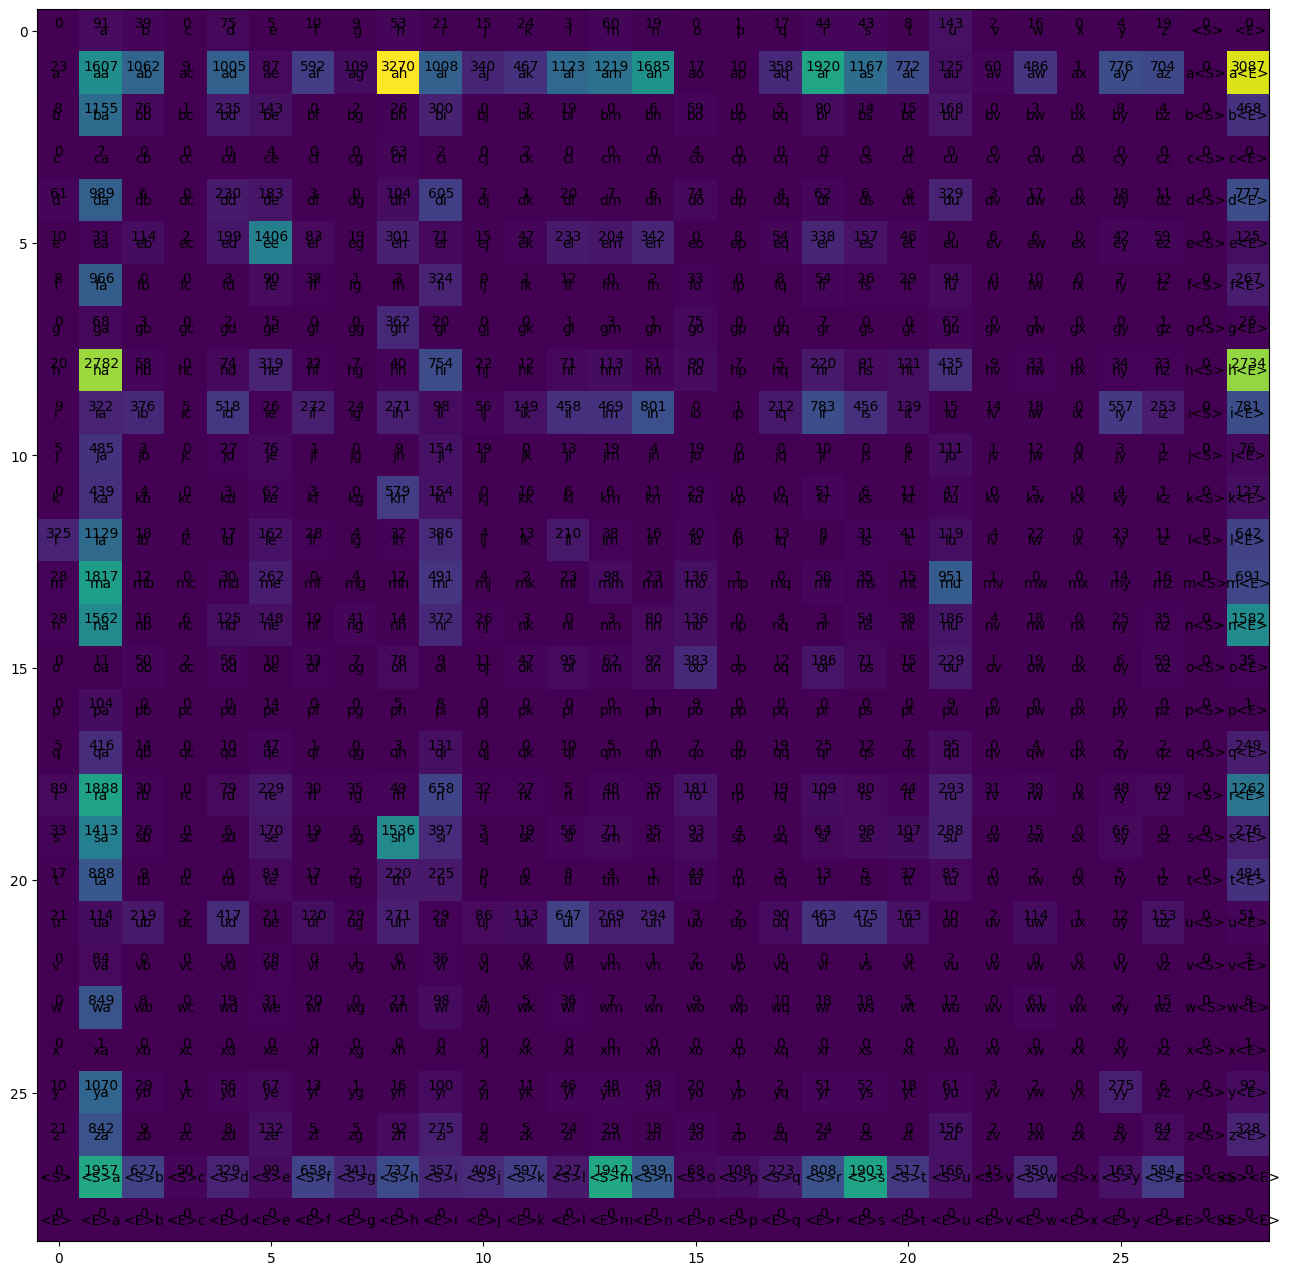

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(N)

for i in range(29):
    for j in range(29):
        chs = decode[i] + decode[j]
        plt.text(j, i, chs, ha='center', va='center')
        plt.text(j, i, N[i, j], ha='center', va='bottom')

#### Choosing the start and end token same i.e., a dot '.' (Reason we did this because the previous model last row is zero and so on etc.)

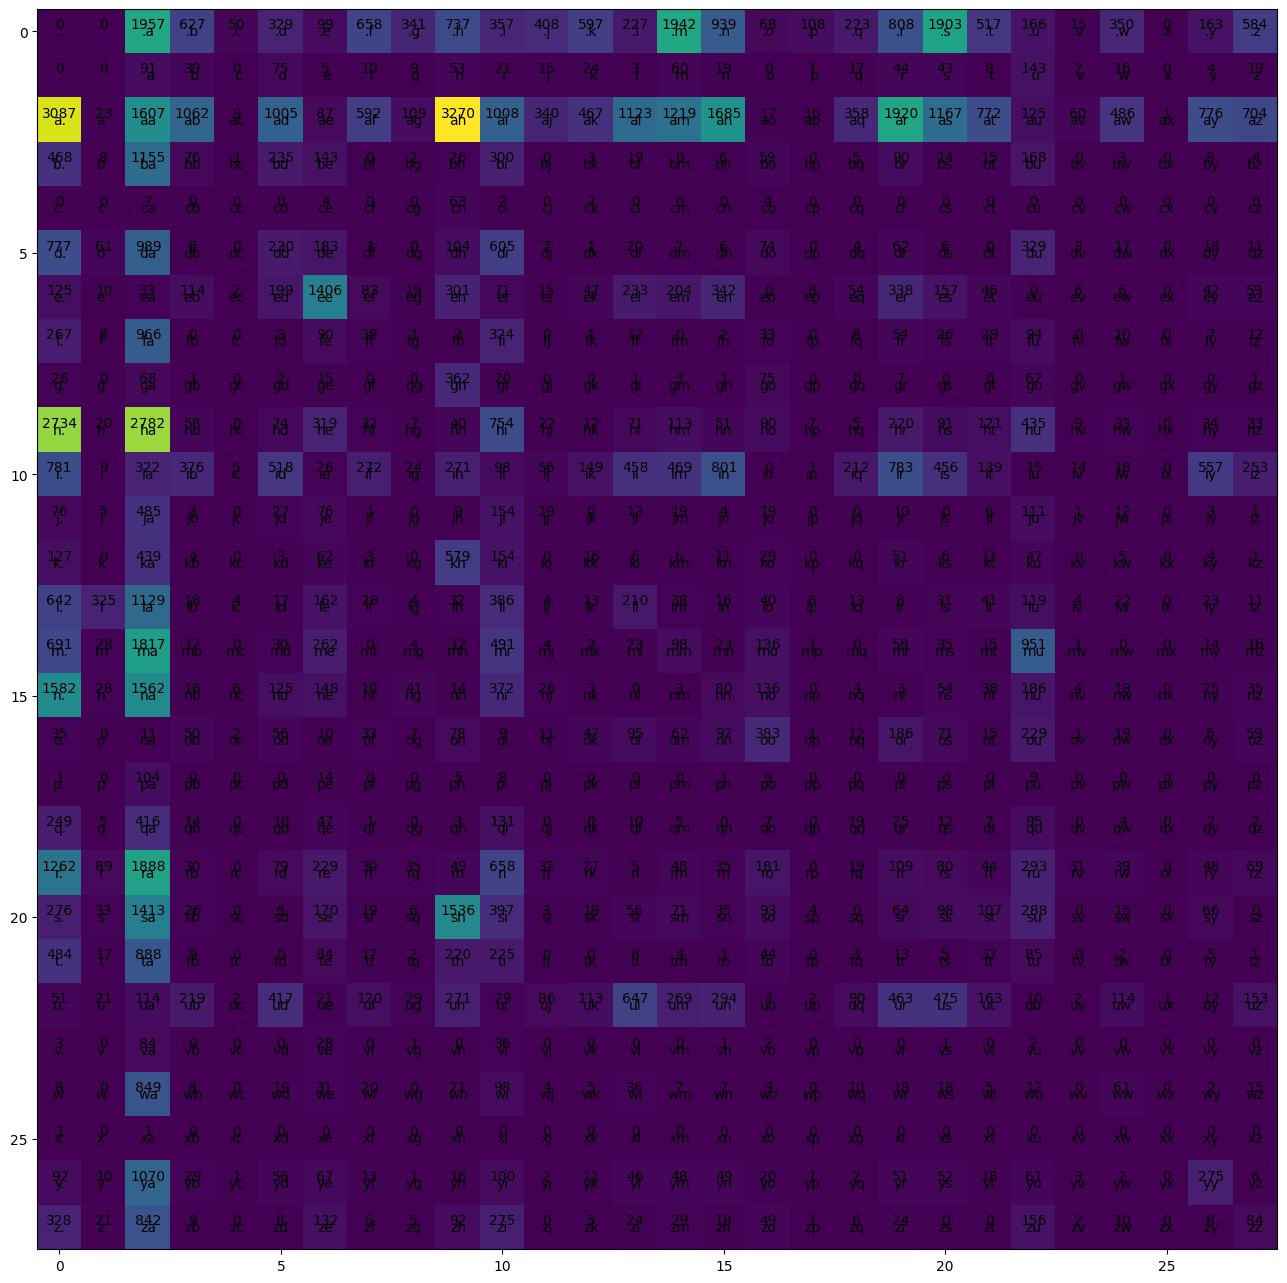

In [15]:
chars = sorted(list(set(''.join(words))))

encode = {c: i+1 for i, c in enumerate(chars)}
encode['.'] = 0

decode = {i: c for c, i in encode.items()}
# create numpy array of zero 29x29 matrix
import numpy as np
N = np.zeros((28,28), dtype=np.int32)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = encode[ch1]
        ix2 = encode[ch2]
        N[ix1, ix2] += 1
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 40))
plt.imshow(N)

for i in range(28):
    for j in range(28):
        chs = decode[i] + decode[j]
        plt.text(j, i, chs, ha='center', va='center')
        plt.text(j, i, N[i, j], ha='center', va='bottom')

#### Using Probabilities 

In [16]:
import torch

N = torch.tensor(N, dtype=torch.float32)

In [17]:
p = N[0]
p = p / p.sum()
p

tensor([0.0000, 0.0000, 0.1381, 0.0442, 0.0035, 0.0232, 0.0070, 0.0464, 0.0241,
        0.0520, 0.0252, 0.0288, 0.0421, 0.0160, 0.1370, 0.0663, 0.0048, 0.0076,
        0.0157, 0.0570, 0.1343, 0.0365, 0.0117, 0.0011, 0.0247, 0.0000, 0.0115,
        0.0412])

In [18]:
g = torch.Generator().manual_seed(0)
ix = torch.multinomial(p, 1, replacement=True, generator=g).item()

decode[ix]

'a'

#### Using Miltinomial Distrubtion of PyTorch to find the next word

In [19]:
g = torch.Generator().manual_seed(0)


for i in range(20):
    out = []

    ix = 0
    while True:
        p = N[ix]
        p = p / p.sum()
        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        out.append(decode[ix])
        if ix == 0:
            break
    print(''.join(out))    

asemadub.
beeen.
d.
kh.
kal.
nnushilisug.
mata.
maabdqranizul.
pasazyat.
jin.
kabraeeyyrar.
r.
shaanafahanuraharur.
f.
rismna.
raai.
shakilah.
kil.
lyahriseba.
m.


#### Shortening the previous code inside while loop

In [20]:
P = N / N.sum(dim=1, keepdims=True)

g = torch.Generator().manual_seed(0)


for i in range(20):
    out = []

    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        out.append(decode[ix])
        if ix == 0:
            break
    print(''.join(out))    

asemadub.
beeen.
d.
kh.
kal.
nnushilisug.
mata.
maabdqranizul.
pasazyat.
jin.
kabraeeyyrar.
r.
shaanafahanuraharur.
f.
rismna.
raai.
shakilah.
kil.
lyahriseba.
m.


#### Caclulating log likelihood, perplexity (Average Log likelihood) and negative log likelihood

In [21]:
log_likelihood = 0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = encode[ch1]
        ix2 = encode[ch2]
        p = P[ix1,ix2]
        logp = torch.log(p)
        log_likelihood += logp
        n += 1
        # print(f'{ch1} -> {ch2} : {p:.3f} {logp:.3f}')

print(f'log likelihood: {log_likelihood:.3f}')
negation = -log_likelihood
print(f'negation: {negation:.3f}')
print(f'perplexity: {negation/n:.3f}')

log likelihood: -250851.922
negation: 250851.922
perplexity: 2.357


#### Model Smoothing because some count are zero so adding one to them

In [22]:
# Model smoothing
P = N+1
P = P / P.sum(dim=1, keepdims=True)
log_likelihood = 0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = encode[ch1]
        ix2 = encode[ch2]
        p = P[ix1,ix2]
        logp = torch.log(p)
        log_likelihood += logp
        n += 1
        # print(f'{ch1} -> {ch2} : {p:.3f} {logp:.3f}')

print(f'log likelihood: {log_likelihood:.3f}')
negation = -log_likelihood
print(f'negation: {negation:.3f}')
print(f'perplexity: {negation/n:.3f}')

log likelihood: -251026.828
negation: 251026.828
perplexity: 2.359


#### Neural Network Model (Training and testing data) - For single word 

In [23]:
# create the training data
xs = []
ys = []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = encode[ch1]
        ix2 = encode[ch2]
        xs.append(ix1)
        ys.append(ix2)
        print(f'{ch1} -> {ch2} : {ix1} {ix2}')

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. -> w : 0 24
w -> a : 24 2
a -> d : 2 5
d -> a : 5 2
a -> a : 2 2
a -> a : 2 2
a -> t : 2 21
t -> . : 21 0


In [24]:
print(xs)
print(ys)

tensor([ 0, 24,  2,  5,  2,  2,  2, 21])
tensor([24,  2,  5,  2,  2,  2, 21,  0])


#### One hot Encoding

In [25]:
# one-hot encoding
import torch.nn.functional as F
Xenc = F.one_hot(xs, num_classes=28).float()
Xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
  

#### Viusalization the one hot encoding

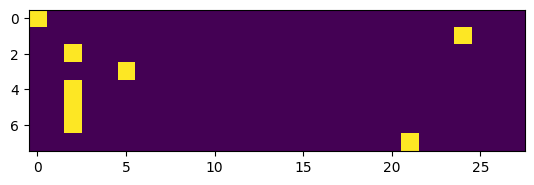

In [26]:
plt.imshow(Xenc)

In [27]:
print(Xenc.dtype, Xenc.shape)

torch.float32 torch.Size([8, 28])


#### Applying the weights formula (Multiplying weights with one hot encoding)

In [28]:
W = torch.randn(28, 28, requires_grad=True)
Xenc @ W 

tensor([[ 1.0203,  0.7492,  1.3796,  0.2773, -0.6036,  0.9250, -0.7373, -0.5836,
          1.4788, -0.0742,  0.1543, -0.3717, -1.6123, -1.0485,  0.4134,  1.1113,
         -0.4612, -0.6797,  0.8336,  1.3853,  0.3103,  0.0730, -1.2376,  0.8864,
          1.6588,  0.7886,  1.4157, -0.5014],
        [-0.9133,  0.5811, -0.4396,  0.6401, -0.1496,  2.1366,  1.5079, -0.5376,
          0.1116,  1.3113,  0.3652, -2.0303, -0.8769,  2.4117,  2.2523, -0.3574,
          2.2500,  0.1895, -0.2344, -1.3399,  0.4000, -0.1423,  0.2707, -0.9239,
          0.1701,  1.0391, -0.1906,  0.8043],
        [ 1.2310, -0.5574, -0.1442,  0.1162,  0.4534,  2.4869,  0.3072, -0.6016,
         -1.1211, -0.0114, -0.3969, -0.0229,  0.3223,  0.4573, -1.0818, -0.4615,
          1.0137, -0.2427, -1.3539,  0.0488, -1.1617,  0.8978,  0.7549,  1.5667,
         -0.2215, -0.7726, -0.2353, -0.5221],
        [ 1.1506, -1.5700,  0.1345,  0.2435,  0.4281,  0.3866, -0.4950, -0.2020,
         -0.0418, -0.1704, -0.9109,  1.8605, -0.6269

In [29]:
logits = Xenc @ W
logits.shape

torch.Size([8, 28])

#### Softmax

In [30]:
counts = logits.exp()

In [31]:
prob = counts / counts.sum(dim=1, keepdims=True)
prob

tensor([[0.0540, 0.0412, 0.0774, 0.0257, 0.0107, 0.0491, 0.0093, 0.0109, 0.0855,
         0.0181, 0.0227, 0.0134, 0.0039, 0.0068, 0.0295, 0.0592, 0.0123, 0.0099,
         0.0448, 0.0779, 0.0266, 0.0210, 0.0057, 0.0473, 0.1023, 0.0429, 0.0803,
         0.0118],
        [0.0057, 0.0255, 0.0092, 0.0270, 0.0123, 0.1206, 0.0643, 0.0083, 0.0159,
         0.0528, 0.0205, 0.0019, 0.0059, 0.1588, 0.1354, 0.0100, 0.1351, 0.0172,
         0.0113, 0.0037, 0.0212, 0.0123, 0.0187, 0.0057, 0.0169, 0.0402, 0.0118,
         0.0318],
        [0.0752, 0.0126, 0.0190, 0.0247, 0.0345, 0.2639, 0.0298, 0.0120, 0.0072,
         0.0217, 0.0148, 0.0214, 0.0303, 0.0347, 0.0074, 0.0138, 0.0605, 0.0172,
         0.0057, 0.0230, 0.0069, 0.0539, 0.0467, 0.1051, 0.0176, 0.0101, 0.0173,
         0.0130],
        [0.0767, 0.0050, 0.0277, 0.0309, 0.0372, 0.0357, 0.0148, 0.0198, 0.0233,
         0.0205, 0.0098, 0.1559, 0.0130, 0.0270, 0.0118, 0.0128, 0.0700, 0.0054,
         0.0342, 0.0435, 0.0388, 0.0658, 0.0080, 0.0165

In [32]:
prob[0].sum()

tensor(1.0000, grad_fn=<SumBackward0>)

#### log likelihood, negative log likelihood for single word

In [33]:
nlls = torch.zeros(7)
for i in range(7):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {decode[x]}{decode[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', prob[i])
  print('label (actual next character):', y)
  p = prob[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .w (indexes 0,24)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0540, 0.0412, 0.0774, 0.0257, 0.0107, 0.0491, 0.0093, 0.0109, 0.0855,
        0.0181, 0.0227, 0.0134, 0.0039, 0.0068, 0.0295, 0.0592, 0.0123, 0.0099,
        0.0448, 0.0779, 0.0266, 0.0210, 0.0057, 0.0473, 0.1023, 0.0429, 0.0803,
        0.0118], grad_fn=<SelectBackward0>)
label (actual next character): 24
probability assigned by the net to the the correct character: 0.10234204679727554
log likelihood: -2.2794346809387207
negative log likelihood: 2.2794346809387207
--------
bigram example 2: wa (indexes 24,2)
input to the neural net: 24
output probabilities from the neural net: tensor([0.0057, 0.0255, 0.0092, 0.0270, 0.0123, 0.1206, 0.0643, 0.0083, 0.0159,
        0.0528, 0.0205, 0.0019, 0.0059, 0.1588, 0.1354, 0.0100, 0.1351, 0.0172,
        0.0113, 0.0037, 0.0212, 0.0123, 0.0187, 0.0057, 0.0169, 0.0402, 0.0118,
        0.0318], grad_fn=<SelectBackward0>)
label (

#### Back Propogation

In [34]:
# one-hot encoding
Xenc = F.one_hot(xs, num_classes=28).float()
logits = Xenc @ W
counts = logits.exp()
prob = counts / counts.sum(dim=1, keepdims=True)
prob[0]

tensor([0.0540, 0.0412, 0.0774, 0.0257, 0.0107, 0.0491, 0.0093, 0.0109, 0.0855,
        0.0181, 0.0227, 0.0134, 0.0039, 0.0068, 0.0295, 0.0592, 0.0123, 0.0099,
        0.0448, 0.0779, 0.0266, 0.0210, 0.0057, 0.0473, 0.1023, 0.0429, 0.0803,
        0.0118], grad_fn=<SelectBackward0>)

In [35]:
print(xs, ys)

tensor([ 0, 24,  2,  5,  2,  2,  2, 21]) tensor([24,  2,  5,  2,  2,  2, 21,  0])


In [36]:
prob[0, ys[0]], prob[1, ys[1]], prob[2, ys[2]], prob[3, ys[3]], prob[4, ys[4]], prob[5, ys[5]], prob[6, ys[6]]

(tensor(0.1023, grad_fn=<SelectBackward0>),
 tensor(0.0092, grad_fn=<SelectBackward0>),
 tensor(0.2639, grad_fn=<SelectBackward0>),
 tensor(0.0277, grad_fn=<SelectBackward0>),
 tensor(0.0190, grad_fn=<SelectBackward0>),
 tensor(0.0190, grad_fn=<SelectBackward0>),
 tensor(0.0539, grad_fn=<SelectBackward0>))

In [37]:
torch.arange(7)

tensor([0, 1, 2, 3, 4, 5, 6])

In [ ]:
loss = -prob[torch.arange(7), ys].log().mean()
loss

In [ ]:
# backward pass
W.grad = None
loss.backward()

In [ ]:
W.grad

tensor([[ 0.0057,  0.0027,  0.0006,  0.0056,  0.0058,  0.0129,  0.0117,  0.0027,
          0.0061,  0.0021,  0.0016,  0.0005,  0.0090,  0.0049,  0.0041,  0.0026,
          0.0028,  0.0067,  0.0011,  0.0120,  0.0016, -0.1389,  0.0025,  0.0066,
          0.0052,  0.0091,  0.0078,  0.0049],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0172,  0.0014,  0.0115,  0.0196,  0.0015, -0.1178,  0.0033,  0.0179,
          0.0191,  0.0037,  0.0014,  0.0087,  0.0310,  0.0020,  0.0046,  0.0200,
          0.0106,  0.0081,  0.0128,  0.0070,  0.0004,  0.0093,  0.0028,  0.0029,
         -0.1399,  0.0352,  0.0045,  0.0010],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [ ]:
W.data -= 0.1 * W.grad

In [ ]:
loss.item()

3.483130931854248

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = encode[ch1]
    ix2 = encode[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(0)
W = torch.randn((28, 28), generator=g, requires_grad=True)

number of examples:  106416


#### Calculating loss (negative log likelihood) after 100 iterations of adjusting weights 

In [ ]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=28).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.3956525325775146
2.3954648971557617
2.3952813148498535
2.395102024078369
2.3949265480041504
2.3947553634643555
2.394587993621826
2.3944242000579834
2.3942644596099854
2.3941075801849365
2.3939545154571533
2.3938045501708984
2.393657922744751
2.393514394760132
2.39337420463562
2.3932366371154785
2.3931021690368652
2.392970085144043
2.39284086227417
2.392714500427246
2.3925905227661133
2.3924694061279297
2.392350673675537
2.3922340869903564
2.392119884490967
2.392007827758789
2.3918983936309814
2.3917906284332275
2.3916852474212646
2.3915817737579346
2.3914804458618164
2.391381025314331
2.3912832736968994
2.3911876678466797
2.3910937309265137
2.3910017013549805
2.390911102294922
2.390822172164917
2.390734910964966
2.3906495571136475
2.3905653953552246
2.3904831409454346
2.390401840209961
2.39032244682312
2.390244245529175
2.390167474746704
2.390092134475708
2.3900177478790283
2.3899447917938232
2.389873504638672
2.389803171157837
2.3897340297698975
2.3896658420562744
2.389599084854126


#### Predicting the names from neural network

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=28).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(decode[ix])
    if ix == 0:
      break
  print(''.join(out))

itaial.
sh.
bah.
noriran.
n.
maz.
ruhahsharira.
sayyar.
fis tuzahadud b.
mahthaqvhash.
rinahaha.
a.
sayeeeltasrienastli.
mummr.
sinaiyya.
beee.
ardanamiyaisah.
maahahtha.
meemash.
zrmulinalatayagecf.
